In [38]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np


df=pd.read_csv("/Social_Network_Ads.csv")

df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
df.shape
x=df.iloc[: ,[2,3]]
y=df.iloc[:,4]
x.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [41]:
#splitting the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print("Trianing data " , x_train.shape)
print("Training data ",x_test.shape)


Trianing data  (300, 2)
Training data  (100, 2)


In [42]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [43]:
#appyling svm
from sklearn.svm import SVC
classifier  = SVC(kernel = 'linear' , random_state=0)
classifier.fit(x_train , y_train)


SVC(kernel='linear', random_state=0)

In [44]:
#predicting the test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [45]:
from sklearn import metrics
print('Accuracy score: withlinear kernel')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy score: withlinear kernel
0.9


In [46]:
from sklearn.svm import SVC
classifier  = SVC(kernel = 'rbf')
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)
y_pred
print('Accuracy score: withdefaultrbfkernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score: withdefaultrbfkernel
0.93


In [47]:
from sklearn.svm import SVC
classifier  = SVC(kernel = 'rbf' , gamma =15 ,C=7, random_state=0 )
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)
print('Accuracy score on test data : with rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score on test data : with rbf kernel
0.89


In [48]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly' ,degree= 4 )
svc.fit(x_train , y_train)
y_pred = svc.predict(x_test)
print('Accuracy score on test data : with poly kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score on test data : with poly kernel
0.79


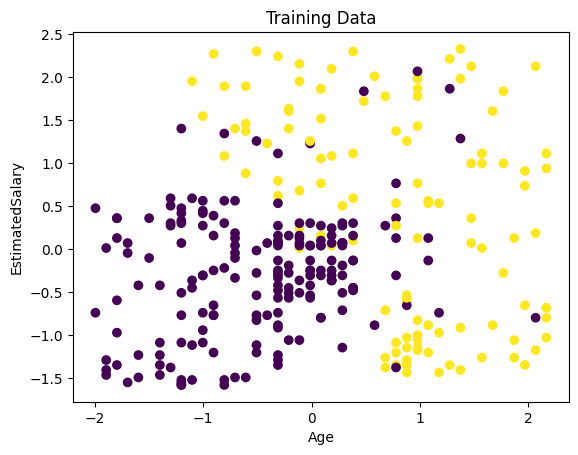

In [49]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

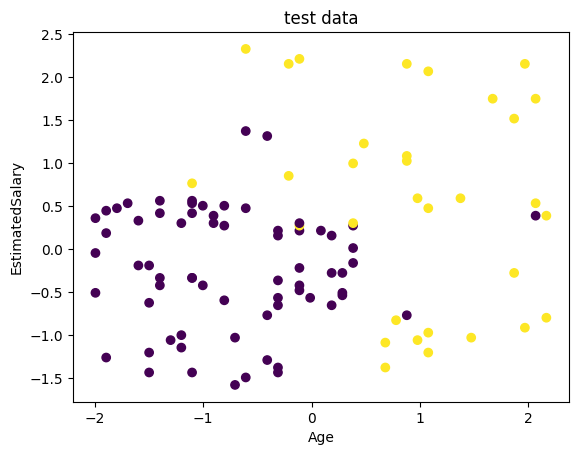

In [50]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_test)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('test data')
plt.show()

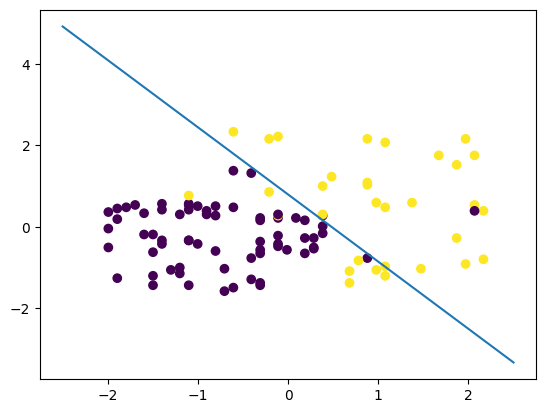

In [51]:
#drawing hpyerplane
from sklearn.svm import SVC
classifier  = SVC(kernel = 'linear' , random_state=0)
classifier.fit(x_train , y_train)
#predicting test set rsly
y_pred= classifier.predict(x_test)
#plot data points
import numpy as np
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
w=classifier.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(classifier.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()



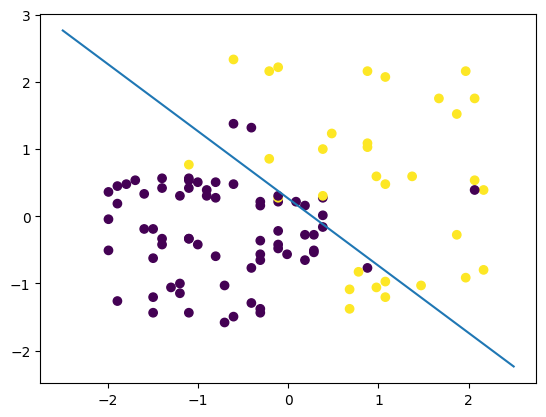

In [52]:
#create hpyerplane
classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
w=classifier.dual_coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(classifier.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

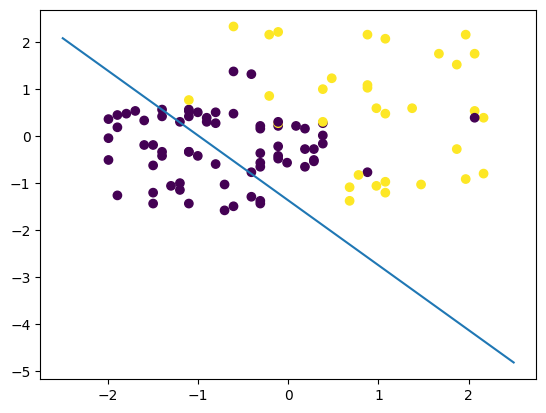

In [53]:
classifier= SVC(kernel='poly',random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
w=classifier.dual_coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(classifier.intercept_[0]/w[1])
plt.plot(xx,yy)
plt.show()

